## Observations and Insights 

#### Tumor size and weight
There is a very strong positive correlation between the tumor volume and the weight of the mouse in those mice treated with Capomulin. Further investigation would be required to determine if higher weight actually causes the tumors to grow bigger, or if these two things are just coincidental. 

#### Drug regimens affect on tumor size
Capomulin and Ramicane both have much smaller ranges of tumor volume compared to the other treatments. They stand out as having the lowest median and mean tumor volume as well as the lowest standard deviation and SEM. This indicates the drugs' success at keeping the tumors from growing.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results, on="Mouse ID")
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Clean the data

In [3]:
# Checking the number of mice.
mouse_study["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study[["Mouse ID","Timepoint"]].value_counts()
duplicate_mice.sort_values(ascending = False).head(15)
# mouse "g989" is the only mouse with duplicate timepoints

Mouse ID  Timepoint
g989      20           2
          10           2
          5            2
          0            2
          15           2
a203      45           1
a411      0            1
a251      15           1
          10           1
          5            1
          0            1
a203      35           1
          40           1
a251      30           1
a203      30           1
dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study.loc[mouse_study["Mouse ID"]=="g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned = mouse_study.loc[mouse_study["Mouse ID"]!="g989",:]
mouse_study_cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_study_cleaned["Mouse ID"].nunique()

248

In [126]:
mouse_study_cleaned[["Drug Regimen","Timepoint"]].groupby("Drug Regimen").describe()

Timepoint                                                    
                 count       mean        std  min   25%   50%    75%   max
Drug Regimen                                                              
Capomulin        230.0  21.565217  14.384994  0.0  10.0  20.0  35.00  45.0
Ceftamin         178.0  19.747191  14.283969  0.0   5.0  20.0  30.00  45.0
Infubinol        178.0  18.174157  13.473473  0.0   5.0  15.0  30.00  45.0
Ketapril         188.0  19.707447  14.029935  0.0   5.0  20.0  30.00  45.0
Naftisol         186.0  19.623656  14.184814  0.0   5.0  20.0  30.00  45.0
Placebo          181.0  18.674033  13.890798  0.0   5.0  15.0  30.00  45.0
Propriva         148.0  17.060811  13.676648  0.0   5.0  15.0  26.25  45.0
Ramicane         228.0  21.425439  14.275720  0.0  10.0  20.0  35.00  45.0
Stelasyn         181.0  19.226519  13.842710  0.0   5.0  20.0  30.00  45.0
Zoniferol        182.0  19.368132  14.384679  0.0   5.0  15.0  30.00  45.0

In [125]:
mouse_study_cleaned[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").describe()

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  148.0  52.320930  6.622085  45.000000  46.894328   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.446266  56.491585  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [148]:
count_time = mouse_study_cleaned[["Mouse ID", "Timepoint"]].groupby("Mouse ID").count().sort_values("Timepoint")
pd.merge(count_time,mouse_study_cleaned, on = "Mouse ID", how = "left").head(50)

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,b447,1,Ceftamin,Male,2,30,0,45.000000,0
1,x226,1,Ceftamin,Male,23,28,0,45.000000,0
2,f932,1,Ketapril,Male,15,29,0,45.000000,0
3,x336,1,Naftisol,Female,4,29,0,45.000000,0
4,l872,1,Placebo,Male,19,30,0,45.000000,0
5,h428,1,Ketapril,Female,1,27,0,45.000000,0
6,o848,1,Stelasyn,Female,14,27,0,45.000000,0
7,t573,1,Ceftamin,Female,15,27,0,45.000000,0
8,v199,1,Naftisol,Female,17,29,0,45.000000,0
9,n482,1,Propriva,Female,4,29,0,45.000000,0


In [136]:
mouse_study_cleaned.loc[mouse_study_cleaned["Tumor Volume (mm3)"]==45]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


## Summary Statistics

Summary statistics generated with groupby and summary statistical methods

In [8]:
# For each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen = mouse_study_cleaned[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen")
mean = regimen.mean()
median = regimen.median()
variance = regimen.var()
std = regimen.std()
sem = regimen.sem()

In [9]:
# Assemble the resulting series into a single summary dataframe.
regimen_stats = pd.merge(mean,median, on = "Drug Regimen")
regimen_stats = regimen_stats.rename(columns={"Tumor Volume (mm3)_x":"Mean Tumor Volume (mm3)","Tumor Volume (mm3)_y":"Median Tumor Volume (mm3)"})
regimen_stats2 = pd.merge(variance,std, on="Drug Regimen")
regimen_stats2 = regimen_stats2.rename(columns={"Tumor Volume (mm3)_x":"Variance","Tumor Volume (mm3)_y":"Standard Deviation"})
regimen_stats = pd.merge(regimen_stats,regimen_stats2, on = "Drug Regimen")
regimen_stats = pd.merge(regimen_stats,sem, on = "Drug Regimen")
regimen_stats = regimen_stats.rename(columns={"Tumor Volume (mm3)":"SEM"})
regimen_stats

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Summary statistics generated using the aggregation method, in one line of code

In [10]:
# For the second table, use the agg method to produce the same summary statistics table by using a single line of code. 
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mouse_study_cleaned[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").aggregate(["mean","median","var","std","sem"],axis="columns")



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

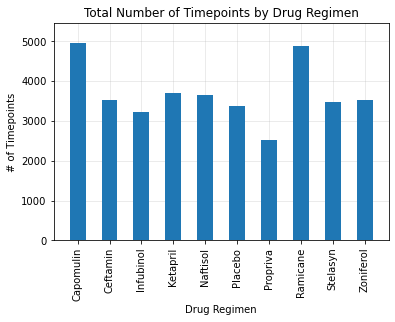

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoint = mouse_study_cleaned[["Drug Regimen", "Timepoint"]].groupby("Drug Regimen")
total_timepoints = total_timepoint.sum()
total_timepoints.plot(kind="bar", title = "Total Number of Timepoints by Drug Regimen",
                     ylabel="# of Timepoints", legend=False, sort_columns=True,zorder=10)
plt.grid(alpha=0.3,zorder=0)
plt.xlim(-.75,len(total_timepoint["Drug Regimen"].unique())-.25)
plt.ylim(0,max(total_timepoints.max())+500)
plt.show()

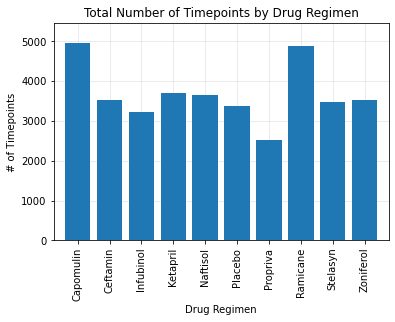

<Figure size 144x216 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
labels = total_timepoints.index
x_axis = np.arange(len(labels))
y_axis = total_timepoints["Timepoint"]

plt.bar(x_axis,y_axis,zorder=10)

plt.title('Total Number of Timepoints by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Timepoints')

plt.xticks(x_axis, labels,rotation="vertical")
plt.grid(alpha=0.3,zorder=0)

plt.xlim(-.75,len(x_axis)-.25)
plt.ylim(0,max(total_timepoints.max())+500)

plt.figure(figsize=(2,3))
plt.tight_layout()
plt.show()




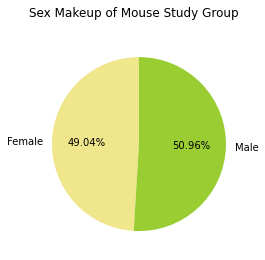

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = mouse_study_cleaned[["Sex","Mouse ID"]].groupby("Sex").count()
mouse_sex.plot(kind="pie",subplots=True, startangle=90, autopct='%.2f%%', colors=['khaki','yellowgreen'],
               legend=False, title="Sex Makeup of Mouse Study Group")
plt.ylabel('')
plt.show()

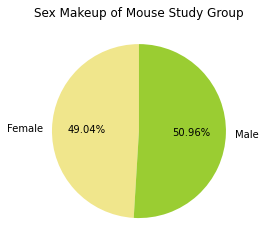

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_sex.index
count = mouse_sex["Mouse ID"]

plt.pie(count, colors=['khaki','yellowgreen'],labels=labels, autopct="%.2f%%",startangle=90)
plt.title("Sex Makeup of Mouse Study Group")

plt.show()


## Quartiles, Outliers and Boxplots

In [116]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_study_cleaned.loc[mouse_study_cleaned["Mouse ID"]=='t573']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1551,t573,Ceftamin,Female,15,27,0,45.0,0


In [15]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mouse_study_cleaned.groupby("Mouse ID").max("Timepoint")[["Tumor Volume (mm3)","Timepoint"]]
max_timepoint.head()

,Tumor Volume (mm3),Timepoint
Mouse ID,,
a203,67.973419,45
a251,65.525743,45
a262,70.717621,45
a275,62.999356,45
a366,63.440686,30


In [16]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint, mouse_study_cleaned, on=["Mouse ID","Timepoint"], how = "left")
merged_df.head()

,Mouse ID,Tumor Volume (mm3)_x,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)_y,Metastatic Sites
0,a203,67.973419,45,Infubinol,Female,20,23,67.973419,2
1,a251,65.525743,45,Infubinol,Female,21,25,65.525743,1
2,a262,70.717621,45,Placebo,Female,17,29,70.717621,4
3,a275,62.999356,45,Ceftamin,Female,20,28,62.999356,3
4,a366,63.440686,30,Stelasyn,Female,16,29,63.440686,1


In [99]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

for t in treatments:
    tumor = merged_df.loc[merged_df["Drug Regimen"]==t,["Drug Regimen","Tumor Volume (mm3)_x","Mouse ID"]].set_index("Mouse ID")
    final_tumors = tumor["Tumor Volume (mm3)_x"]
    if t == "Capomulin":
        capomulin = final_tumors
    elif t == "Ramicane":
        ramicane = final_tumors
    elif t == "Infubinol":
        infubinol = final_tumors
    elif t == "Ceftamin":
        ceftamin = final_tumors

In [96]:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
# Determine outliers using upper and lower bounds
# CAPOMULIN    
capomulin_quartiles = capomulin.quantile([0.25,0.5,0.75])

capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

capomulin_outliers = capomulin.loc[capomulin > capomulin_upper_bound] + capomulin.loc[capomulin < capomulin_lower_bound]
capomulin_outliers

Series([], Name: Tumor Volume (mm3)_x, dtype: float64)

In [97]:
ramicane.describe()["25%"]

45.0

In [98]:
# RAMICANE    
ramicane_quartiles = ramicane.quantile([0.25,0.5,0.75])

ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
print(f'Lower Q {ramicane_lowerq}')
print(f'Upper Q {ramicane_upperq}')
print(f'IQR {ramicane_iqr}')

Lower Q 45.0
Upper Q 46.34383237
IQR 1.3438323700000012


In [70]:
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f'Lower Bound {ramicane_lower_bound}')
print(f'Upper Bound {ramicane_upper_bound}')

Lower Bound 42.984251445
Upper Bound 48.359580925


In [50]:
ramicane_outliers = ramicane.loc[ramicane > ramicane_upper_bound] + ramicane.loc[ramicane < ramicane_lower_bound]
ramicane_outliers

Series([], Name: Tumor Volume (mm3)_x, dtype: float64)

In [49]:
# INFUBINOL    
infubinol_quartiles = infubinol.quantile([0.25,0.5,0.75])

infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

infubinol_outliers = infubinol.loc[infubinol > infubinol_upper_bound] + infubinol.loc[infubinol < infubinol_lower_bound]
infubinol_outliers

Series([], Name: Tumor Volume (mm3)_x, dtype: float64)

In [114]:
# ceftamin    
ceftamin
#print(ceftamin.describe())

Mouse ID
a275    62.999356
b447    45.000000
b487    56.057749
b759    55.742829
f436    48.722078
h531    47.784682
j296    61.849023
k210    68.923185
l471    67.748662
l490    57.918381
l558    46.784535
l661    59.851956
l733    64.299830
o287    59.741901
p438    61.433892
q483    64.192341
t573    45.000000
u149    52.925348
u153    45.000000
w151    67.527482
x226    45.000000
x581    64.634949
x822    61.386660
y769    68.594745
y865    64.729837
Name: Tumor Volume (mm3)_x, dtype: float64

In [64]:
ceftamin_quartiles = ceftamin.quantile([0.25,0.5,0.75])

ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
print(f'Lower Q {ceftamin_lowerq}')
print(f'Upper Q {ceftamin_upperq}')
print(f'IQR {ceftamin_iqr}')

Lower Q 48.72207785
Upper Q 64.29983003
IQR 15.577752179999997


In [107]:
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f'Lower Bound {ceftamin_lower_bound}')
print(f'Upper Bound {ceftamin_upper_bound}')

Lower Bound 25.355449580000002
Upper Bound 87.66645829999999


In [108]:
ceftamin_outliers = ceftamin.loc[ceftamin > ceftamin_upper_bound] + ceftamin.loc[ceftamin < ceftamin_lower_bound]
print(f'Potential Outliers: {ceftamin_outliers}')

Potential Outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)


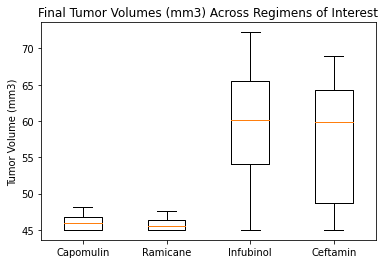

In [109]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
data = [capomulin,ramicane,infubinol,ceftamin]
ax1.boxplot(data)

ax1.set_title("Final Tumor Volumes (mm3) Across Regimens of Interest")
ax1.set_xticklabels(treatments)
ax1.set_ylabel("Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

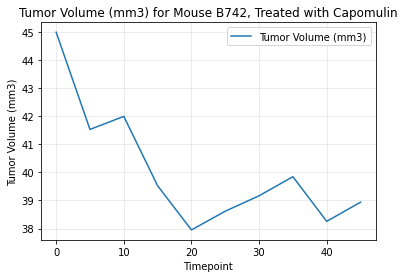

In [110]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice = mouse_study_cleaned.loc[mouse_study_cleaned["Drug Regimen"]=="Capomulin",:]
mouse = capomulin_mice.loc[capomulin_mice["Mouse ID"]== 'b742',:][["Tumor Volume (mm3)","Timepoint"]]

mouse.plot("Timepoint","Tumor Volume (mm3)",kind="line")
plt.title("Tumor Volume (mm3) for Mouse B742, Treated with Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(alpha=0.3,zorder=0)
plt.show()

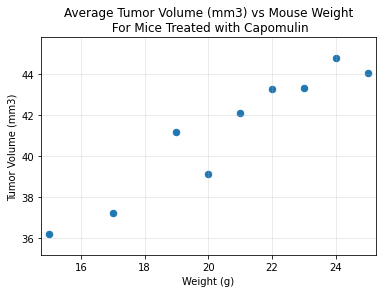

In [111]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_weight = capomulin_mice[["Tumor Volume (mm3)","Weight (g)"]].groupby("Weight (g)").mean("Tumor Volume (mm3)")
avg_tumor_weight=avg_tumor_weight.reset_index()
avg_tumor_weight.plot(x="Weight (g)", y="Tumor Volume (mm3)",kind="scatter",s=42)

plt.title("Average Tumor Volume (mm3) vs Mouse Weight\n For Mice Treated with Capomulin")
plt.grid(alpha=0.3,zorder=0)
plt.xlim(min(avg_tumor_weight["Weight (g)"])-0.25, max(avg_tumor_weight["Weight (g)"])+0.25)
plt.ylim(min(avg_tumor_weight["Tumor Volume (mm3)"])-1, max(avg_tumor_weight["Tumor Volume (mm3)"]+1))

plt.show()

## Correlation and Regression

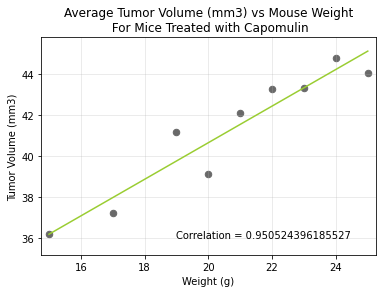

In [112]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_tumor_weight['Weight (g)']
y_values = avg_tumor_weight['Tumor Volume (mm3)']
correlation = st.pearsonr(x_values,y_values)
correlation_str = correlation[0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.plot(x_values,regress_values,color="yellowgreen",linewidth=1.5)
plt.scatter(x_values, y_values,color="dimgrey",s=42)

plt.title("Average Tumor Volume (mm3) vs Mouse Weight\n For Mice Treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(alpha=0.3,zorder=0)
plt.xlim(min(x_values)-0.25, max(x_values)+0.25)
plt.ylim(min(y_values)-1, max(y_values)+1)

plt.annotate(f'Correlation = {correlation_str}',(19,36))
plt.show()